In [116]:
# coding:utf-8
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy import stats
from scipy.stats import norm, skew
train_file = '../train_dataset/train_dataset.csv' 
test_file = '../test_dataset/test_dataset.csv'

train = pd.read_csv(train_file, encoding='utf-8')
test = pd.read_csv(test_file, encoding='utf-8')

# print(train.head())
test.head()

,用户编码,用户实名制是否通过核实,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户,用户网龄（月）,用户最近一次缴费距今时长（月）,缴费用户最近一次缴费金额（元）,用户近6个月平均消费值（元）,...,当月是否看电影,当月是否景点游览,当月是否体育场馆消费,当月网购类应用使用次数,当月物流快递类应用使用次数,当月金融理财类应用使用总次数,当月视频播放类应用使用次数,当月飞机类应用使用次数,当月火车类应用使用次数,当月旅游资讯类应用使用次数
0,7171737d49b143d1b38883a39e4a5730,1,30,0,0,0,22,1,99.8,69.53,...,0,1,0,281,0,74,807,0,0,2
1,3af0a449d5424488912e8fb2bf4b9faa,1,70,0,0,0,84,0,0.0,12.89,...,0,0,0,0,0,0,0,0,0,0
2,eb2cf02e0d5c4d1294dd73e776dbb441,1,35,0,0,0,237,0,0.0,161.71,...,1,1,1,186,0,943,261,0,0,0
3,9c0f780ecb254670a11aa9e3f10777c5,1,44,0,0,0,161,0,0.0,229.60,...,1,1,1,244,0,72,591,0,0,3
4,d794eed46c1e44f785a575f18b3023a5,1,44,0,0,0,153,1,99.8,105.42,...,0,1,1,132,0,0,88,0,0,0


In [117]:
print(train.shape, test.shape)
train_Id = train[u'用户编码']
test_Id = test[u'用户编码']

train.drop(u'用户编码', axis=1, inplace=True)
test.drop(u'用户编码', axis=1, inplace=True)

print(train.shape, test.shape)

(50000, 30) (50000, 29)
(50000, 29) (50000, 28)


ValueError: Invalid format specifier

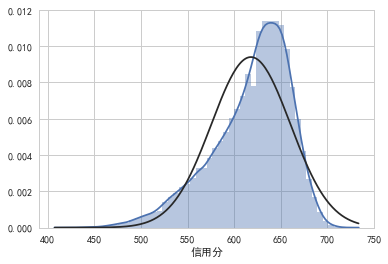

In [118]:
sns.distplot(train[u'信用分'], fit=norm)
(mu, sigma) = norm.fit(train[u'信用分'])
print('\n mu={:.2f and sigma = {:.2f}\n}'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=${:.2f} and $\sigma=${:.2f}'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Grade distribution')

fig = plt.figure()
res = stats.probplot(train['信用分'], plot=plt)
plt.show()

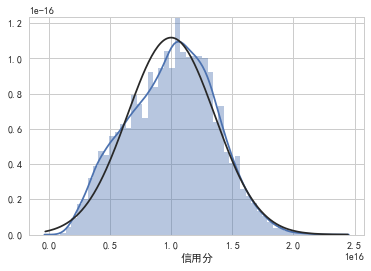

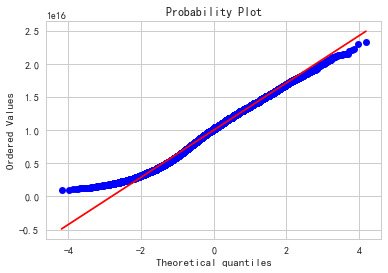

In [96]:
# from scipy.special import boxcox1p
# lam = 6
# train['信用分'] = boxcox1p(train['信用分'], lam)
# # sns.set_style()
# sns.distplot(train[u'信用分'], fit=norm)
# # print(skew(train['信用分']))
# fig = plt.figure()
# res = stats.probplot(train['信用分'], plot=plt)
# plt.show()

In [119]:
# Feature Engineering 
ntrain = train.shape[0]
ntest = test.shape[0]

y_train = train.信用分.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop('信用分', axis=1, inplace=True)
print('All data size is {}'.format(all_data.shape))

All data size is (100000, 28)


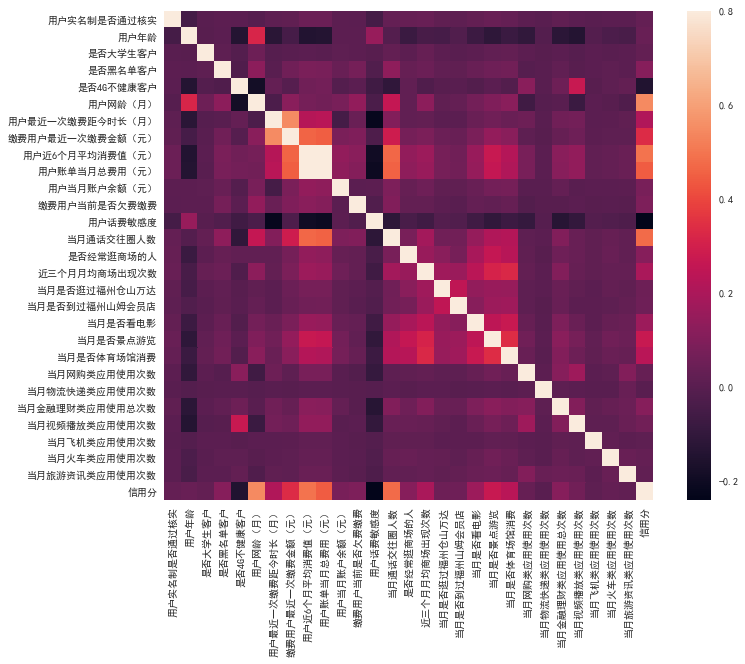

In [120]:
corrmat = train.corr()
plt.subplots(figsize=(12, 9))
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
sns.heatmap(corrmat, vmax=0.8, square=True)

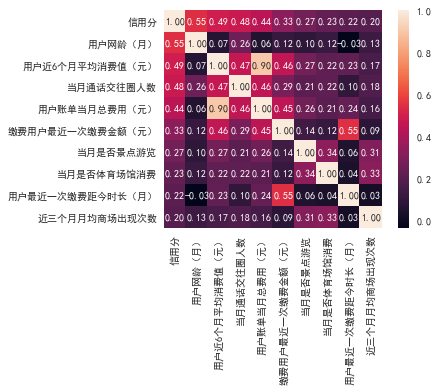

In [121]:
# 找出与输出结果相关性较大的前10项
k = 10
cols = corrmat.nlargest(k, '信用分')['信用分'].index
cm = np.corrcoef(train[cols].values.T)
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
hm = sns.heatmap(cm, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [122]:
cols = ('用户网龄（月）', '用户近6个月平均消费值（元）', '用户账单当月总费用（元）', '缴费用户最近一次缴费金额（元）', '当月是否景点游览', 
        '当月是否体育场馆消费', '用户最近一次缴费距今时长（月）', '近三个月月均商场出现次数', '用户年龄','是否大学生客户','是否黑名单客户',
        '是否4G不健康客户')
data = pd.DataFrame()
for col in cols:
    data[col] = train[col]
    
data.head()
# print(type(all_data['用户年龄']))
# all_data['用户年龄'] = all_data['用户年龄'].apply(str)
# print(type(all_data['用户年龄']))

,用户网龄（月）,用户近6个月平均消费值（元）,用户账单当月总费用（元）,缴费用户最近一次缴费金额（元）,当月是否景点游览,当月是否体育场馆消费,用户最近一次缴费距今时长（月）,近三个月月均商场出现次数,用户年龄,是否大学生客户,是否黑名单客户,是否4G不健康客户
0,186,163.86,159.20,99.80,1,1,1,75,44,0,0,0
1,5,153.28,145.10,29.94,0,0,1,16,18,0,0,1
2,145,109.64,120.20,49.90,0,0,1,1,47,0,0,0
3,234,92.97,167.42,99.80,1,1,1,26,55,0,0,0
4,76,95.47,101.00,49.90,1,0,1,44,40,0,0,0


In [100]:
numeric_feats = all_data.dtypes[all_data.dtypes!='object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x:skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'skew':skewed_feats})
skewness.index

Index(['当月旅游资讯类应用使用次数', '当月飞机类应用使用次数', '用户当月账户余额（元）', '当月物流快递类应用使用次数',
       '当月金融理财类应用使用总次数', '当月火车类应用使用次数', '当月视频播放类应用使用次数', '当月网购类应用使用次数',
       '是否大学生客户', '当月是否到过福州山姆会员店', '当月通话交往圈人数', '当月是否逛过福州仓山万达', '是否黑名单客户',
       '缴费用户当前是否欠费缴费', '是否4G不健康客户', '缴费用户最近一次缴费金额（元）', '用户账单当月总费用（元）',
       '用户近6个月平均消费值（元）', '当月是否看电影', '近三个月月均商场出现次数', '是否经常逛商场的人', '当月是否体育场馆消费',
       '用户网龄（月）', '当月是否景点游览', '用户话费敏感度', '用户最近一次缴费距今时长（月）', '用户实名制是否通过核实'],
      dtype='object')

In [101]:
skewness = skewness[abs(skewness) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 6.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(100000, 115)


In [123]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [124]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, data.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [125]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 28.5988 (0.1232)



In [ ]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, randon.state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

class AverageingModels(BaseExtimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone[x] for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)
        return self
    
    def predict(self, X):
        prediction = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)
    
class StackingAveragedModels(BaseEximator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_models = meat_models
        self.n_folds = n_folds
        
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_models_ = clone(self.meta_models)
        kfold = KFold(n_splits=self.n_folds, shuufle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shapep[0], len(self.base_models_)))
               for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)
    